## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [2017]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2018]:
# your code here
data = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv')
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [2019]:
data.isna().any()

status                     False
duration                   False
credit_history             False
purpose                    False
amount                     False
savings                    False
employment_duration        False
installment_rate           False
personal_status_sex        False
other_debtors              False
present_residence          False
property                   False
age                        False
other_installment_plans    False
housing                    False
number_credits             False
job                        False
people_liable              False
telephone                  False
foreign_worker             False
credit_risk                False
dtype: bool

В данных нет пропусков.

In [2020]:
for (columnName, columnData) in data.iteritems():
      print(str(columnName) + " " + str(data[columnName].unique()) + "\n\n")


status ['no checking account' '... < 0 DM'
 '... >= 200 DM / salary for at least 1 year' '0<= ... < 200 DM']


duration [18  9 12 10  8  6 24 11 30 48 36 15 42 21 27 33 28  4 47 14 39 60  5 22
 54 13 16  7 20 26 45 72 40]


credit_history ['all credits at this bank paid back duly'
 'no credits taken/all credits paid back duly'
 'existing credits paid back duly till now'
 'delay in paying off in the past'
 'critical account/other credits elsewhere']


purpose ['car (used)' 'others' 'retraining' 'furniture/equipment' 'car (new)'
 'business' 'domestic appliances' 'radio/television' 'repairs' 'vacation']


amount [ 1049  2799   841  2122  2171  2241  3398  1361  1098  3758  3905  6187
  1957  7582  1936  2647  3939  3213  2337  7228  3676  3124  2384  1424
  4716  4771   652  1154  3556  4796  3017  3535  6614  1376  1721   860
  1495  1934  3378  3868   996  1755  1028  2825  1239  1216  1258  1864
  1474  1382   640  3919  1224  2331  6313   385  1655  1053  3160  3079
  1163  2679  3578

Из полученных выше данных можно сделать следующие выводы:  
status - порядковый ('no checking account' обозначит за 0, все остальное логично сопоставить цифрам)  
duration - количественный  
credit_history - категориальный  (непонятно, что может быть лучше или хуже относительно друг друга, поэтому не порядковый)   
purpose - категориальный  
amount - количественный   
savings - порядковый
employment_duration - порядковый   
installment_rate - порядковый 
personal_status_sex - категориальный  
other_debtors - категориальный  
present_residence - порядковый  
property - категориальный  
age - количественный  
other_installment_plans - категориальный   
housing - категориальный   
number_credits - порядковый  
job - категориальный  
people_liable - бинарный (так как всего два возможных значения)  
telephone - бинарный   
foreign_worker - бинарный  
credit_risk - бинарный  

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [2021]:
data.groupby('purpose')[['amount']].mean()

,amount
purpose,
business,8209.333333
car (new),5370.223301
car (used),3066.983425
domestic appliances,2728.090909
furniture/equipment,2487.685714
others,3062.948718
radio/television,1498.000000
repairs,3180.400000
retraining,4158.041237


### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [2022]:
print(str(len(data[(data['housing'] == 'rent') & (data['age'] < 30)]) / len(data[data['age'] < 30])*100) + "%")
print(str(len(data[(data['housing'] == 'rent') & (data['age'] > 40)]) / len(data[data['age'] > 40])*100) + "%")

66.66666666666666%
68.01470588235294%


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [2023]:
len(data[(data['foreign_worker'] == 'yes') & ((data['number_credits'] == '4-5') | (data['number_credits'] =='>= 6'))])

1

### Задание 6 (1 балл)

In [2024]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

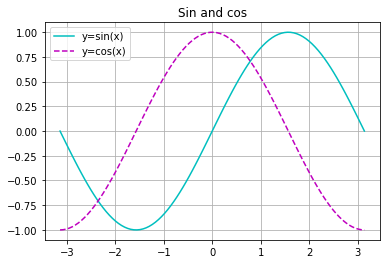

In [2025]:
import math
x = np.linspace(-math.pi, math.pi, 100)
plt.plot(x, np.sin(x), 'c', x, np.cos(x),'m--')
plt.grid()
plt.title("Sin and cos")
plt.legend(['y=sin(x)','y=cos(x)'])
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

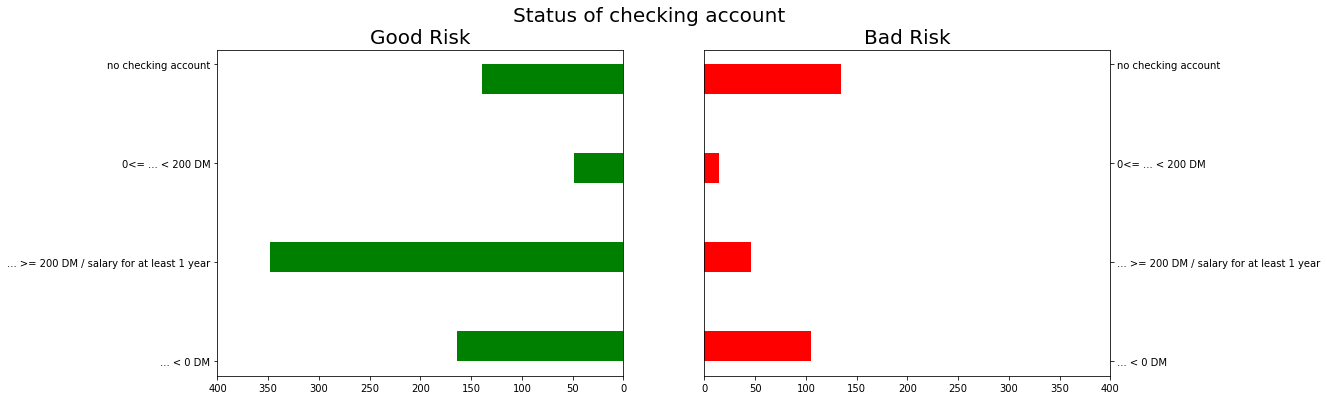

In [2026]:
fig, ax = plt.subplots(1,2,figsize=(16,6))

plt.suptitle('Status of checking account', fontsize=20)

plt.subplot (1, 2, 1)
plt.title('Good Risk', fontsize=20)

a = data[data['credit_risk'] == 'good'][['status']]
a = a.sort_values(by='status')

ax = plt.subplot(1, 2, 1)
ax.hist(a, orientation=u'horizontal', color = "g")
plt.locator_params (axis='x', nbins= 8)
plt.xlim(0, 400)
ax.set_xlim(ax.get_xlim()[::-1])

ax.yaxis.tick_left()

plt.subplot (1, 2, 2)

plt.title('Bad Risk', fontsize=20)

a = data[data['credit_risk'] == 'bad'][['status']]
a = a.sort_values(by='status')

ax = plt.subplot(1, 2, 2)
ax.hist(a, orientation=u'horizontal', color = "r")
plt.locator_params (axis='x', nbins= 8)
plt.xlim(0, 400)
ax.yaxis.tick_right()

plt.show()

По графику видно, что положительные кейсы чаще всего происходят тогда, когда на расчетом счете максимальное кол-во средств, а негативные кейсы чаще всего происходят, когда на расчетном счете нет денег.

### Задание 8  (0.5 балла)

In [2027]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

Text(0.5, 1.0, 'The number of positive and negative cases depending on the size of the savings account')

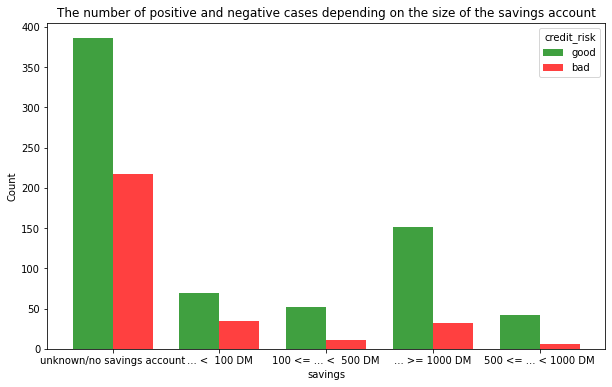

In [2028]:
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(data, x='savings',  hue='credit_risk', multiple="dodge", shrink=.75, palette=['g', 'r'], linewidth=0)
plt.title("The number of positive and negative cases depending on the size of the savings account")

По графику видно, что больше всего положительных кейсов происходит при самых больших сберегательных счетах, а негативных в равной степени много как при самых больших значениях сберегательного счета так и при самых мальенких.

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

Text(0.5, 1.0, 'Age distribution depending on age for positive and negative cases')

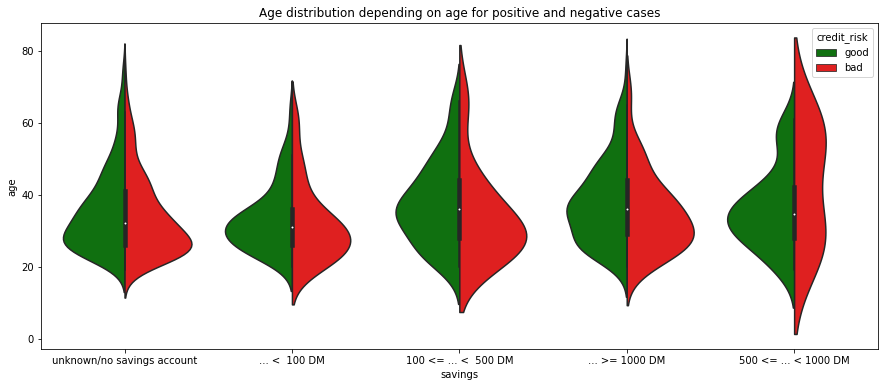

In [2029]:
fig, ax = plt.subplots(figsize=(15,6))
sns.violinplot(x="savings", y="age", hue="credit_risk", split=True, data=data,palette=["g", "r"])
plt.title("Age distribution depending on age for positive and negative cases")

Из графика можно сделать вывод, что при любом кол-во денег на сберигательном счете, пик плохих рисков находится раньше чем пик хороших, что говорит о том, что молодые клиенты более рисковые для банка (в плохом смысле), чем взрослые. 

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

[Text(0.5, 1.0, 'Distribution of all credit taken by age')]

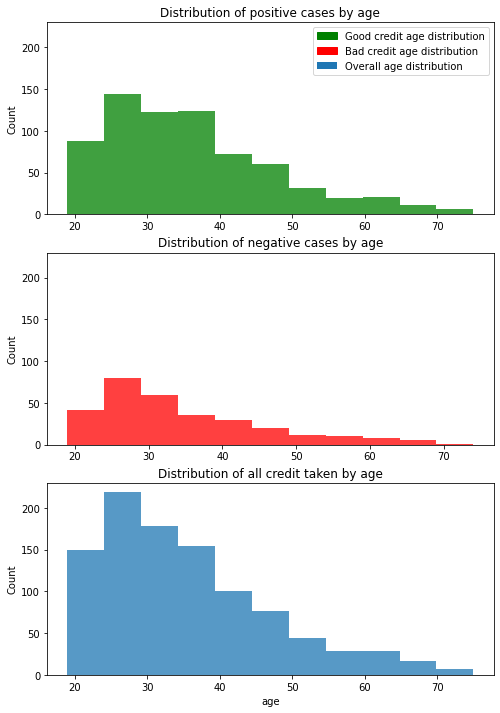

In [2030]:
import matplotlib.patches as mpatches

line1 = mpatches.Patch(color='g', label='Good credit age distribution')
line2 = mpatches.Patch(color='r', label='Bad credit age distribution')
line3 = mpatches.Patch(label='Overall age distribution')

fig, axes = plt.subplots(3, 1, figsize=(8, 12),sharey=True)

s = sns.histplot(ax=axes[0], x=data[data['credit_risk']== 'good'].age, color='g', bins = 11,linewidth=0)
s.set(xlabel=None)
s.set(title = 'Distribution of positive cases by age')
s.legend(handles=[line1,line2,line3])

s = sns.histplot(ax=axes[1], x=data[data['credit_risk']== 'bad'].age, color='r', bins = 11,linewidth=0)
s.set(xlabel=None)
s.set(title = 'Distribution of negative cases by age')

s = sns.histplot(ax=axes[2], x=data.age, bins = 11,linewidth=0)
s.set(title = 'Distribution of all credit taken by age')

Из графика можно сделать вывод, что большинство и плохих и хороших кейсов были у клиентов, чей возраст примерно равен 25-35 лет. Так же видно, что в среднем положительных кейсов больше, чем отрицательных.

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

[Text(0.5, 1.0, 'Scatter chart with duration and amount of credit')]

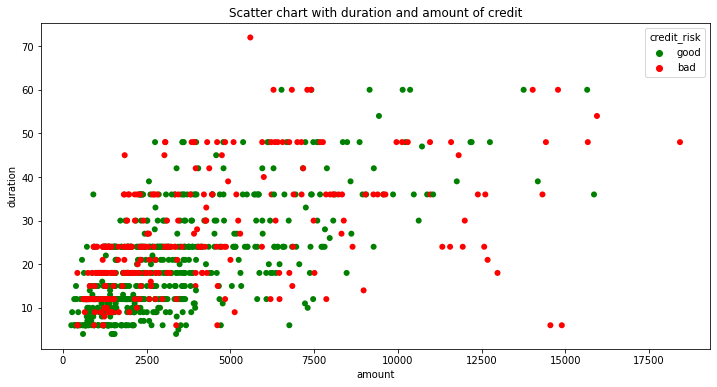

In [2031]:
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(x='amount', y='duration', data=data, hue="credit_risk",palette=["g", "r"],linewidth=0).set(title='Scatter chart with duration and amount of credit')

Из данного графика можно понять, чаще всего кредиты были небольшой суммы, видно, что на больших суммах кредитов чаще риск становится плохим. Так же видно, что положительные кейсы сгрупировались на маленькой продолжительности и маленькой суммой кредита.

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

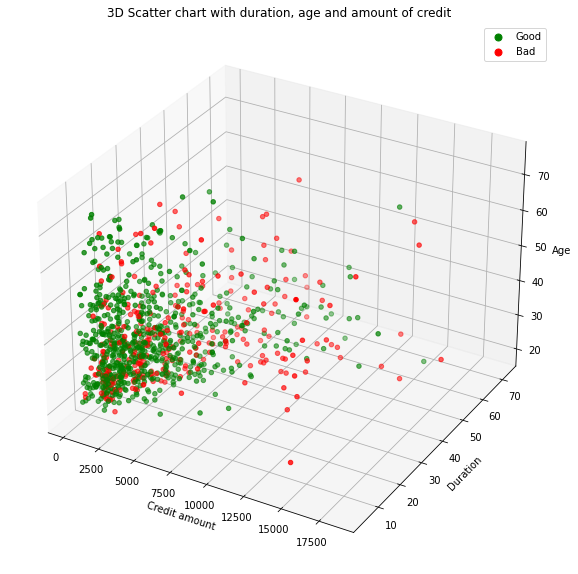

In [2032]:
from matplotlib.lines import Line2D
ax = plt.figure(figsize = (10, 10)).add_subplot(projection='3d')

s = ax.scatter(data['amount'], data['duration'], data['age'], c=data['credit_risk'].replace({ 'good': 'g', 'bad': 'r'}))
ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')
plt.title('3D Scatter chart with duration, age and amount of credit')

line1 = Line2D([0], [0], linestyle='none', marker='o',color='g', label='Good', markersize=7)
line2 = Line2D([0], [0], linestyle='none', marker='o',color='r', label='Bad', markersize=7)
plt.legend(handles=[line1,line2])


По графику так же видно, что положительные кейсы при любом возрасте происходили при маленькой сумме и маленькой продолжительности. Видно разрброс отрицательных кейсов, что при большой сумме кредита и маленькой продолжительности риск становится плохим, учитывая еще что его брал молодой человек. В целом видно, что кредиты имеют хороший риск, если они берутся на относительно небольшую сумму, на относительно небольшое время.

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [2033]:
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [2034]:
# Работаем с бинарными признаками.
data.loc[data['people_liable'] == "0 to 2", 'people_liable'] = 0
data.loc[data['people_liable'] == "3 or more", 'people_liable'] = 1

data.loc[data['telephone'] == "no", 'telephone'] = 0
data.loc[data['telephone'] == "yes (under customer name)", 'telephone'] = 1

data.loc[data['foreign_worker'] == "no", 'foreign_worker'] = 0
data.loc[data['foreign_worker'] == "yes", 'foreign_worker'] = 1

data.loc[data['credit_risk'] == "bad", 'credit_risk'] = 0
data.loc[data['credit_risk'] == "good", 'credit_risk'] = 1

data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0,0,0,1
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,1,0,0,1
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0,0,0,1
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,1,0,1,1
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0,0,1,1


In [2035]:
# Работаем с порядковыми признаками.
data.loc[data['employment_duration'] == "unemployed", 'employment_duration'] = 0
data.loc[data['employment_duration'] == "< 1 yr", 'employment_duration'] = 1
data.loc[data['employment_duration'] == "1 <= ... < 4 yrs", 'employment_duration'] = 2
data.loc[data['employment_duration'] == "4 <= ... < 7 yrs", 'employment_duration'] = 3
data.loc[data['employment_duration'] == ">= 7 yrs", 'employment_duration'] = 4

data.loc[data['installment_rate'] == "< 20", 'installment_rate'] = 0
data.loc[data['installment_rate'] == "25 <= ... < 35", 'installment_rate'] = 1
data.loc[data['installment_rate'] == "20 <= ... < 25", 'installment_rate'] = 2
data.loc[data['installment_rate'] == ">= 35", 'installment_rate'] = 3

data.loc[data['present_residence'] == ">= 7 yrs", 'present_residence'] = 0
data.loc[data['present_residence'] == "1 <= ... < 4 yrs", 'present_residence'] = 1
data.loc[data['present_residence'] == "4 <= ... < 7 yrs", 'present_residence'] = 2
data.loc[data['present_residence'] == "< 1 yr", 'present_residence'] = 3

data.loc[data['number_credits'] == "1", 'number_credits'] = 0
data.loc[data['number_credits'] == "2-3", 'number_credits'] = 1
data.loc[data['number_credits'] == "4-5", 'number_credits'] = 2
data.loc[data['number_credits'] == ">= 6", 'number_credits'] = 3

data.loc[data['savings'] == "unknown/no savings account", 'savings'] = 0
data.loc[data['savings'] == "... <  100 DM", 'savings'] = 1
data.loc[data['savings'] == "100 <= ... <  500 DM", 'savings'] = 2
data.loc[data['savings'] == "... >= 1000 DM", 'savings'] = 3
data.loc[data['savings'] == "500 <= ... < 1000 DM", 'savings'] = 4

data.loc[data['status'] == "no checking account", 'status'] = 0
data.loc[data['status'] == "... < 0 DM", 'status'] = 1
data.loc[data['status'] == "... >= 200 DM / salary for at least 1 year", 'status'] = 2
data.loc[data['status'] == "0<= ... < 200 DM", 'status'] = 3

data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,18,all credits at this bank paid back duly,car (used),1049,0,1,0,female : non-single or male : single,none,...,car or other,21,none,for free,0,skilled employee/official,0,0,0,1
1,0,9,all credits at this bank paid back duly,others,2799,0,2,1,male : married/widowed,none,...,unknown / no property,36,none,for free,1,skilled employee/official,1,0,0,1
2,1,12,no credits taken/all credits paid back duly,retraining,841,1,3,1,female : non-single or male : single,none,...,unknown / no property,23,none,for free,0,unskilled - resident,0,0,0,1
3,0,12,all credits at this bank paid back duly,others,2122,0,2,2,male : married/widowed,none,...,unknown / no property,39,none,for free,1,unskilled - resident,1,0,1,1
4,0,12,all credits at this bank paid back duly,others,2171,0,2,0,male : married/widowed,none,...,car or other,38,bank,rent,1,unskilled - resident,0,0,1,1


In [2036]:
# удаляем категориальные признаки
data = data.drop(columns=['credit_history','purpose','personal_status_sex','other_debtors','property','other_installment_plans','housing','job'])
data

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,telephone,foreign_worker,credit_risk
0,0,18,1049,0,1,0,0,21,0,0,0,0,1
1,0,9,2799,0,2,1,1,36,1,1,0,0,1
2,1,12,841,1,3,1,0,23,0,0,0,0,1
3,0,12,2122,0,2,2,1,39,1,1,0,1,1
4,0,12,2171,0,2,0,0,38,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,24,1987,0,2,1,0,21,0,1,0,0,0
996,0,24,2303,0,4,0,3,45,0,0,0,0,0
997,2,21,12680,3,4,0,0,30,0,0,1,0,0
998,1,12,6468,3,0,1,3,52,0,0,1,0,0


In [2037]:
data

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,telephone,foreign_worker,credit_risk
0,0,18,1049,0,1,0,0,21,0,0,0,0,1
1,0,9,2799,0,2,1,1,36,1,1,0,0,1
2,1,12,841,1,3,1,0,23,0,0,0,0,1
3,0,12,2122,0,2,2,1,39,1,1,0,1,1
4,0,12,2171,0,2,0,0,38,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,24,1987,0,2,1,0,21,0,1,0,0,0
996,0,24,2303,0,4,0,3,45,0,0,0,0,0
997,2,21,12680,3,4,0,0,30,0,0,1,0,0
998,1,12,6468,3,0,1,3,52,0,0,1,0,0


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [2038]:
def predict(Xtest: np.array) -> np.array:
    k = np.linspace(0, 0, Xtest.shape[0])
    i = 0
    for a in Xtest:
      # кредит считается более рисковым при большой сумме и если
      # человек молодой, или короткий срок, или мало денег на сберегательном счету,
      # или мало денег на расчетном счету.
      if (a[2] > 7000 and (a[7] < 30 or a[1] < 40 or a[4] == 1 or a[0] == 1)):
        k[i] = 0
      else:
        k[i] = 1
      i+=1
    return k

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

print(accuracy_score(y_train.astype(int), predict(X_train)))
y_test = y_test.astype(int)
print(accuracy_score(y_test, predict(X_test)))

0.716
0.644


<ipython-input-2038-97b594258c14>:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('credit_risk', 1).values
